## 调试设备

In [3]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())  #输出为True，则安装无误

2.1.2
11.8
True


### 调试写入文件

In [3]:
import os
print(os.getcwd())
file_path = "train1.csv"
if not os.path.isfile(file_path):
    print(1)
    with open(file_path, 'w') as f:
        f.write('id,step,e_x,e_y\n')
else:
    print(2)

C:\Users\10749\Desktop\my_UAV\DQN+UAV\V1.4
2


### 不同时间步通信下的状况

68


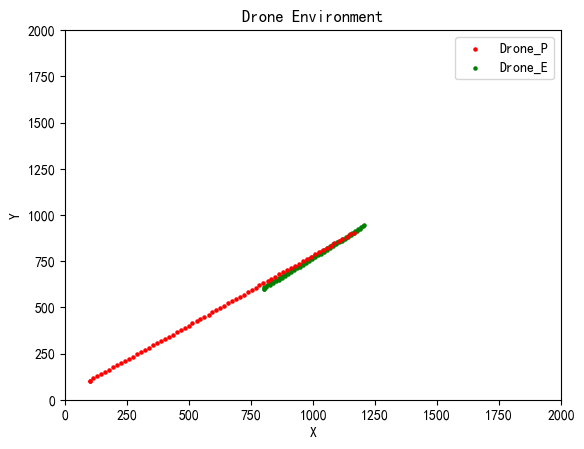

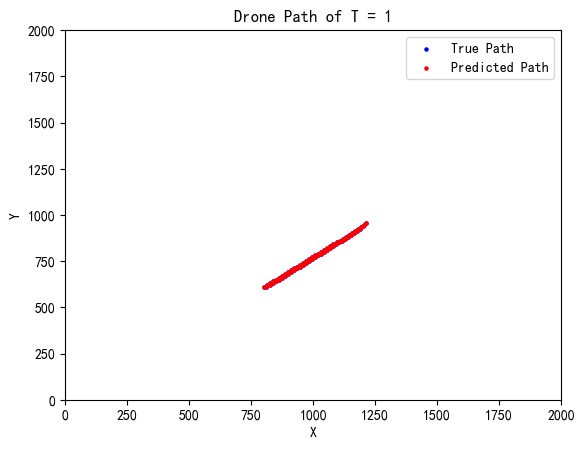

68


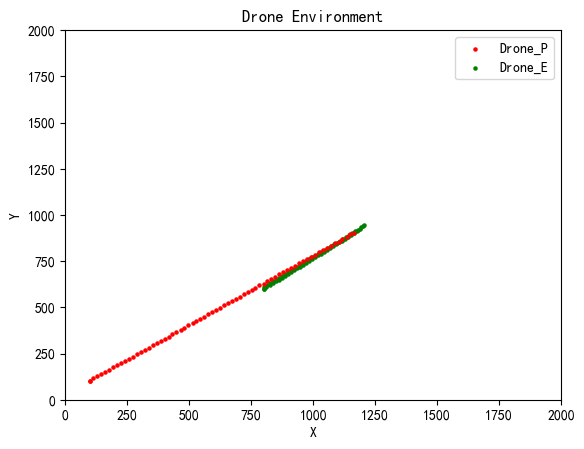

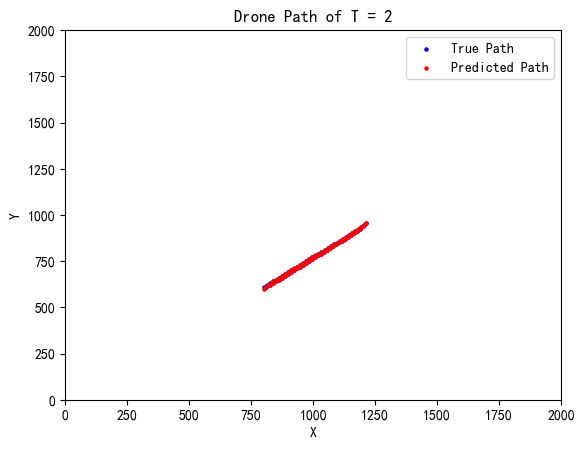

68


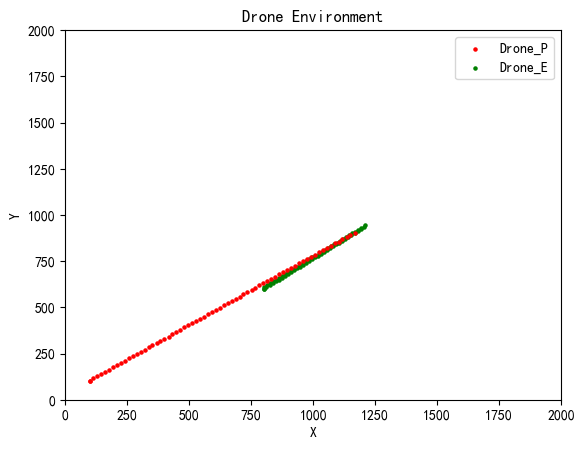

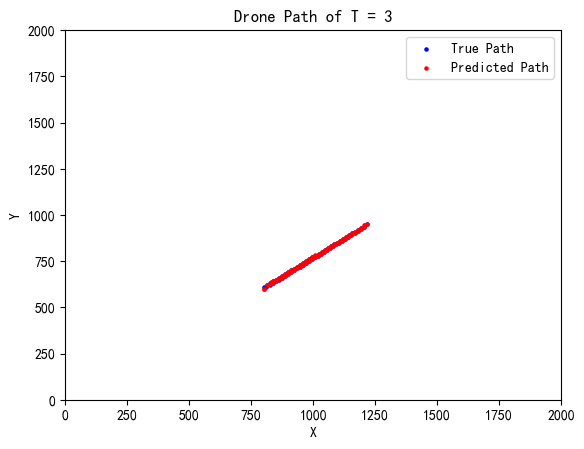

In [1]:
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3 import DDPG
from stable_baselines3.common.vec_env.dummy_vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import gym
import env_v3_P_TP
env = env_v3_P_TP.DroneEnv()
# 在每个 episode 的开始调用一次 env.render()
x=[]
model_p = DDPG.load("TrainedModel/Actor_p1.4.pkl")
for i in range(3):
    # 存储真实位置和预测位置的列表
    x_true_list = []
    y_true_list = []
    x_pre_list = []
    y_pre_list = []

    state,_ = env.reset()
    env.render(mode='human')
    #model_p = DDPG.load("TrainedModel/Actor1.2.pkl")
    done = False
    r = 0
    #plt.figure()
    #plt.scatter(env.goal[0], env.goal[1], marker='x', color='green', label='Goal')
    plt.xlim(env.space1.low[0], env.space1.high[0])
    plt.ylim(env.space1.low[1], env.space1.high[1])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Drone Environment')
    #print(state)
    t1 = 0
    while not done:
        t1 += 1
        env.render(mode='human')
        #action_p, _states_p = model_p.predict(state, deterministic=True)
        action_p, _states_e = model_p.predict(state, deterministic=True)
        #action_e = 0
        #print(action)
        #print(state, action_e)
        next_state, reward, done, t,  info = env.step(action_p)
        # 存储真实位置和预测位置
        x_true_list.append(env.data_true[-1][0])
        y_true_list.append(env.data_true[-1][1])
        x_pre_list.append(env.data_pre[-1][0])
        y_pre_list.append(env.data_pre[-1][1])
        r += reward
        state = next_state
        #print(r)
    print(t1)
    x.append(t1)
    plt.show()
    plt.xlim(env.space1.low[0], env.space1.high[0])
    plt.ylim(env.space1.low[1], env.space1.high[1])
    plt.scatter(x_true_list, y_true_list, label='True Path', color='blue',s=5)
    plt.scatter(x_pre_list, y_pre_list, label='Predicted Path', color='red',s=5)
    # 添加标签和标题
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Drone Path of T = {}'.format(env.t_nape))
    plt.show()
